In [1]:
import numpy as np
import pandas as pd
from gensim.parsing.preprocessing import preprocess_string,preprocess_documents
from gensim import corpora,models, similarities
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, StratifiedKFold
from sklearn import preprocessing
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import EnsembleVoteClassifier
import re
import xgboost as xgb
color = sns.color_palette()
%matplotlib inline
from xgboost import XGBClassifier
from sklearn import metrics

D:\Drace\Anaconda2\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
import pyLDAvis.gensim

In [3]:
df1 = pd.read_csv('newdfcleaned.csv', encoding="ISO-8859-1")

In [4]:
df1 = df1.drop('Unnamed: 0', 1)

In [5]:
df1.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [140]:
essay_question = ["""More and more people use computers, but not everyone agrees that this benefits society. Those who support advances in technology believe that computers have a positive effect on people. 
They teach hand-eye coordination, give people the ability to learn about faraway places and people, and even allow people to talk online with other people. Others have different ideas. 
Some experts are concerned that people are spending too much time on their computers and less time exercising, enjoying nature, and interacting with family and friends. 
Write a letter to your local newspaper in which you state your opinion on the effects computers have on people. Persuade the readers to agree with you.""",
                 """More and more people use computers, but not everyone agrees that this benefits society. Those who support advances in technology believe that computers have a positive effect on people. 
                 They teach hand-eye coordination, give people the ability to learn about faraway places and people, and even allow people to talk online with other people. Others have different ideas. 
                 Some experts are concerned that people are spending too much time on their computers and less time exercising, enjoying nature, and interacting with family and friends. 
Write a letter to your local newspaper in which you state your opinion on the effects computers have on people. Persuade the readers to agree with you.""",
                 """Source Essay
ROUGH ROAD AHEAD: Do Not Exceed Posted Speed Limit
by Joe Kurmaskie
FORGET THAT OLD SAYING ABOUT NEVER taking candy from strangers. No, a better piece of advice for the solo cyclist would be, “Never accept travel advice from a collection of old-timers who haven’t left the confines of their porches since Carter was in office.” It’s not that a group of old guys doesn’t know the terrain. With age comes wisdom and all that, but the world is a fluid place. Things change. 
At a reservoir campground outside of Lodi, California, I enjoyed the serenity of an early-summer evening and some lively conversation with these old codgers. What I shouldn’t have done was let them have a peek at my map. Like a foolish youth, the next morning I followed their advice and launched out at first light along a “shortcut” that was to slice away hours from my ride to Yosemite National Park.
They’d sounded so sure of themselves when pointing out landmarks and spouting off towns I would come to along this breezy jaunt. Things began well enough. I rode into the morning with strong legs and a smile on my face. About forty miles into the pedal, I arrived at the first “town.” This place might have been a thriving little spot at one time—say, before the last world war—but on that morning 
it fit the traditional definition of a ghost town. I chuckled, checked my water supply, and moved on. The sun was beginning to beat down, but I barely noticed it. The cool pines and rushing rivers of Yosemite had my name written all over them. 
Twenty miles up the road, I came to a fork of sorts. One ramshackle shed, several rusty pumps, and a corral that couldn’t hold in the lamest mule greeted me. This sight was troubling. I had been hitting my water bottles pretty regularly, and I was traveling through the high deserts of California in June.
I got down on my hands and knees, working the handle of the rusted water pump with all my strength. A tarlike substance oozed out, followed by brackish water feeling somewhere in the neighborhood of two hundred degrees. I pumped that handle for several minutes, but the water wouldn’t cool down. It didn’t matter. When I tried a drop or two, it had the flavor of battery acid.
The old guys had sworn the next town was only eighteen miles down the road. I could make that! I would conserve my water and go inward for an hour or so—a test of my inner spirit. 
Not two miles into this next section of the ride, I noticed the terrain changing. Flat road was replaced by short, rolling hills. After I had crested the first few of these, a large highway sign jumped out at me. It read: ROUGH ROAD AHEAD: DO NOT EXCEED POSTED SPEED LIMIT.
The speed limit was 55 mph. I was doing a water-depleting 12 mph. Sometimes life can feel so cruel. 
I toiled on. At some point, tumbleweeds crossed my path and a ridiculously large snake—it really did look like a diamondback—blocked the majority of the pavement in front of me. I eased past, trying to keep my balance in my dehydrated state.
The water bottles contained only a few tantalizing sips. Wide rings of dried sweat circled my shirt, and the growing realization that I could drop from heatstroke on a gorgeous day in June simply because I listened to some gentlemen who hadn’t been off their porch in decades, caused me to laugh.
It was a sad, hopeless laugh, mind you, but at least I still had the energy to feel sorry for myself. There was no one in sight, not a building, car, or structure of any kind. I began breaking the ride down into distances I could see on the horizon, telling myself that if I could make it that far, I’d be fi ne.
Over one long, crippling hill, a building came into view. I wiped the sweat from my eyes to make sure it wasn’t a mirage, and tried not to get too excited. With what I believed was my last burst of energy, I maneuvered down the hill.
In an ironic twist that should please all sadists reading this, the building—abandoned years earlier, by the looks of it—had been a Welch’s Grape Juice factory and bottling plant. A sandblasted picture of a young boy pouring a refreshing glass of juice into his mouth could still be seen.
I hung my head.
That smoky blues tune “Summertime” rattled around in the dry honeycombs of my deteriorating brain.
I got back on the bike, but not before I gathered up a few pebbles and stuck them in my mouth. I’d read once that sucking on stones helps take your mind off thirst by allowing what spit you have left to circulate. With any luck I’d hit a bump and lodge one in my throat.
It didn’t really matter. I was going to die and the birds would pick me clean, leaving only some expensive outdoor gear and a diary with the last entry in praise of old men, their wisdom, and their keen sense of direction. I made a mental note to change that paragraph if it looked like I was going to lose consciousness for the last time.
Somehow, I climbed away from the abandoned factory of juices and dreams, slowly gaining elevation while losing hope. Then, as easily as rounding a bend, my troubles, thirst, and fear were all behind me.
GARY AND WILBER’S FISH CAMP—IF YOU WANT BAIT FOR THE BIG ONES, WE’RE YOUR BEST BET!
“And the only bet,” I remember thinking.
As I stumbled into a rather modern bathroom and drank deeply from the sink, I had an overwhelming urge to seek out Gary and Wilber, kiss them, and buy some bait—any bait, even though I didn’t own a rod or reel.
An old guy sitting in a chair under some shade nodded in my direction. Cool water dripped from my head as I slumped against the wall beside him.
“Where you headed in such a hurry?”
“Yosemite,” I whispered.
“Know the best way to get there?”
I watched him from the corner of my eye for a long moment. He was even older than the group I’d listened to in Lodi.
“Yes, sir! I own a very good map.”
And I promised myself right then that I’d always stick to it in the future.
“Rough Road Ahead” by Joe Kurmaskie, from Metal Cowboy, copyright © 1999 Joe Kurmaskie.
Prompt
Write a response that explains how the features of the setting affect the cyclist. In your response, include examples from the essay that support your conclusion.""",
                 """
Winter Hibiscus by Minfong Ho
Saeng, a teenage girl, and her family have moved to the United States from Vietnam. As Saeng walks home after failing her driver’s test, she sees a familiar plant. Later, she goes to a florist shop to see if the plant can be purchased.
It was like walking into another world. A hot, moist world exploding with greenery. Huge flat leaves, delicate wisps of tendrils, ferns and fronds and vines of all shades and shapes grew in seemingly random profusion.
“Over there, in the corner, the hibiscus. Is that what you mean?” The florist pointed at a leafy potted plant by the corner. 
There, in a shaft of the wan afternoon sunlight, was a single blood-red blossom, its five petals splayed back to reveal a long stamen tipped with yellow pollen. Saeng felt a shock of recognition so intense, it was almost visceral.1
“Saebba,” Saeng whispered.
A saebba hedge, tall and lush, had surrounded their garden, its lush green leaves dotted with vermilion flowers. And sometimes after a monsoon rain, a blossom or two would have blown into the well, so that when she drew the well water, she would find a red blossom floating in the bucket.
Slowly, Saeng walked down the narrow aisle toward the hibiscus. Orchids, lanna bushes, oleanders, elephant ear begonias, and bougainvillea vines surrounded her. Plants that she had not even realized she had known but had forgotten drew her back into her childhood world.
When she got to the hibiscus, she reached out and touched a petal gently. It felt smooth and cool, with a hint of velvet toward the center—just as she had known it would feel.
And beside it was yet another old friend, a small shrub with waxy leaves and dainty flowers with purplish petals and white centers. “Madagascar periwinkle,” its tag announced. How strange to see it in a pot, Saeng thought. Back home it just grew wild, jutting out from the cracks in brick walls or between tiled roofs.
And that rich, sweet scent—that was familiar, too. Saeng scanned the greenery around her and found a tall, gangly plant with exquisite little white blossoms on it.  “Dok Malik,” she said, savoring the feel of the word on her tongue, even as she silently noted the English name on its tag, “jasmine.”
One of the blossoms had fallen off, and carefully Saeng picked it up and smelled it. She closed her eyes and breathed in, deeply. The familiar fragrance filled her lungs, and Saeng could almost feel the light strands of her grandmother’s long gray hair, freshly washed, as she combed it out with the fine-toothed buffalo-horn comb. And when the sun had dried it, Saeng would help the gnarled old fingers knot the hair into a bun, then slip a dok Malik bud into it.
Saeng looked at the white bud in her hand now, small and fragile. Gently, she closed her palm around it and held it tight. That, at least, she could hold on to. But where was the fine-toothed comb? The hibiscus hedge? The well? Her gentle grandmother? 
A wave of loss so deep and strong that it stung Saeng’s eyes now swept over her. A blink, a channel switch, a boat ride into the night, and it was all gone. Irretrievably, irrevocably gone.
And in the warm moist shelter of the greenhouse, Saeng broke down and wept.
It was already dusk when Saeng reached home. The wind was blowing harder, tearing off the last remnants of green in the chicory weeds that were growing out of the cracks in the sidewalk. As if oblivious to the cold, her mother was still out in the vegetable garden, digging up the last of the onions with a rusty trowel. She did not see Saeng until the girl had quietly knelt down next to her.
Her smile of welcome warmed Saeng. “Ghup ma laio le? You’re back?” she said cheerfully. “Goodness, it’s past five. What took you so long? How did it go? Did you—?” Then she noticed the potted plant that Saeng was holding, its leaves quivering in the wind.
Mrs. Panouvong uttered a small cry of surprise and delight. “Dok faeng-noi!” she said. “Where did you get it?”
“I bought it,” Saeng answered, dreading her mother’s next question.
“How much?”
For answer Saeng handed her mother some coins.
“That’s all?” Mrs. Panouvong said, appalled, “Oh, but I forgot! You and the
Lambert boy ate Bee-Maags . . . .”
“No, we didn’t, Mother,” Saeng said.
“Then what else—?”
“Nothing else. I paid over nineteen dollars for it.”
“You what?” Her mother stared at her incredulously. “But how could you? All the seeds for this vegetable garden didn’t cost that much! You know how much we—” She paused, as she noticed the tearstains on her daughter’s cheeks and her puffy eyes.
“What happened?” she asked, more gently.
“I—I failed the test,” Saeng said.
For a long moment Mrs. Panouvong said nothing. Saeng did not dare look her mother in the eye. Instead, she stared at the hibiscus plant and nervously tore off a leaf, shredding it to bits.
Her mother reached out and brushed the fragments of green off Saeng’s hands. “It’s a beautiful plant, this dok faeng-noi,” she finally said. “I’m glad you got it.”
“It’s—it’s not a real one,” Saeng mumbled.
“I mean, not like the kind we had at—at—” She found that she was still too shaky to say the words at home, lest she burst into tears again. “Not like the kind we had before,” she said.
“I know,” her mother said quietly. “I’ve seen this kind blooming along the lake. Its flowers aren’t as pretty, but it’s strong enough to make it through the cold months here, this winter hibiscus. That’s what matters.”
She tipped the pot and deftly eased the ball of soil out, balancing the rest of the plant in her other hand. “Look how root-bound it is, poor thing,” she said. “Let’s plant it, right now.”
She went over to the corner of the vegetable patch and started to dig a hole in the ground. The soil was cold and hard, and she had trouble thrusting the shovel into it. Wisps of her gray hair trailed out in the breeze, and her slight frown deepened the wrinkles around her eyes. There was a frail, wiry beauty to her that touched Saeng deeply.
“Here, let me help, Mother,” she offered, getting up and taking the shovel away from her.
Mrs. Panouvong made no resistance. “I’ll bring in the hot peppers and bitter melons, then, and start dinner. How would you like an omelet with slices of the bitter melon?”
“I’d love it,” Saeng said.
Left alone in the garden, Saeng dug out a hole and carefully lowered the “winter hibiscus” into it. She could hear the sounds of cooking from the kitchen now, the beating of eggs against a bowl, the sizzle of hot oil in the pan. The pungent smell of bitter melon wafted out, and Saeng’s mouth watered. It was a cultivated taste, she had discovered—none of her classmates or friends, not even Mrs. Lambert, liked it—this sharp, bitter melon that left a golden aftertaste on the tongue. But she had grown up eating it and, she admitted to herself, much preferred it to a Big Mac.
The “winter hibiscus” was in the ground now, and Saeng tamped down the soil around it. Overhead, a flock of Canada geese flew by, their faint honks clear and—yes—familiar to Saeng now. Almost reluctantly, she realized that many of the things that she had thought of as strange before had become, through the quiet repetition of season upon season, almost familiar to her now. Like the geese. She lifted her head and watched as their distinctive V was etched against the evening sky, slowly fading into the distance.
When they come back, Saeng vowed silently to herself, in the spring, when the snows melt and the geese return and this hibiscus is budding, then I will take that test again.
“Winter Hibiscus” by Minfong Ho, copyright © 1993 by Minfong Ho, from Join In, Multiethnic Short Stories, by Donald R. Gallo, ed.
Prompt
Read the last paragraph of the story.

"When they come back, Saeng vowed silently to herself, in the spring, when the snows melt and the geese return and this hibiscus is budding, then I will take that test again." 

Write a response that explains why the author concludes the story with this paragraph. In your response, include details and examples from the story that support your ideas.""",
                 """Narciso Rodriguez
from Home: The Blueprints of Our Lives
My parents, originally from Cuba, arrived in the United States in 1956. After living for a year in a furnished one-room apartment, twenty-one-year-old Rawedia Maria and twenty-seven-year-old Narciso Rodriguez, Sr., could afford to move into a modest, three-room apartment I would soon call home.
In 1961, I was born into this simple house, situated in a two-family, blond-brick building in the Ironbound section of Newark, New Jersey. Within its walls, my young parents created our traditional Cuban home, the very heart of which was the kitchen. My parents both shared cooking duties and unwittingly passed on to me their rich culinary skills and a love of cooking that is still with me today (and for which I am eternally grateful). Passionate Cuban music (which I adore to this day) filled the air, mixing with the aromas of the kitchen. Here, the innocence of childhood, the congregation of family and friends, and endless celebrations that encompassed both, formed the backdrop to life in our warm home.
Growing up in this environment instilled in me a great sense that “family” had nothing to do with being a blood relative. Quite the contrary, our neighborhood was made up of mostly Spanish, Cuban, and Italian immigrants at a time when overt racism was the norm and segregation prevailed in the United States. In our neighborhood, despite customs elsewhere, all of these cultures came together in great solidarity and friendship. It was a close-knit community of honest, hardworking immigrants who extended a hand to people who, while not necessarily their own kind, were clearly in need.
Our landlord and his daughter, Alegria (my babysitter and first friend), lived above us, and Alegria graced our kitchen table for meals more often than not. Also at the table were Sergio and Edelmira, my surrogate grandparents who lived in the basement apartment. (I would not know my “real” grandparents, Narciso the Elder and Consuelo, until 1970 when they were allowed to leave Cuba.) My aunts Bertha and Juanita and my cousins Arnold, Maria, and Rosemary also all lived nearby and regularly joined us at our table. Countless extended family members came and went — and there was often someone staying with us temporarily until they were able to get back on their feet. My parents always kept their arms and their door open to the many people we considered family, knowing that they would do the same for us.
My mother and father had come to this country with such courage, without any knowledge of the language or the culture. They came selflessly, as many immigrants do, to give their children a better life, even though it meant leaving behind their families, friends, and careers in the country they loved. They struggled both personally and financially, braving the harsh northern winters while yearning for their native tropics and facing cultural hardships. The barriers to work were strong and high, and my parents both had to accept that they might not be able to find the kind of jobs they deserved. In Cuba, Narciso, Sr., had worked in a laboratory and Rawedia Maria had studied chemical engineering. In the United States, they had to start their lives over entirely, taking whatever work they could find. The faith that this struggle would lead them and their children to better times drove them to endure these hard times.
I will always be grateful to my parents for their love and sacrifice. I’ve often told them that what they did was a much more courageous thing than I could have ever done. I’ve often told them of my admiration for their strength and perseverance, and I’ve thanked them repeatedly. But, in reality, there is no way to express my gratitude for the spirit of generosity impressed upon me at such an early age and the demonstration of how important family and friends are. These are two lessons that my parents did not just tell me. They showed me with their lives, and these teachings have been the basis of my life.
It was in this simple house that my parents welcomed other refugees to celebrate their arrival to this country and where I celebrated my first birthdays. It was in the warmth of the kitchen in this humble house where a Cuban feast (albeit a frugal Cuban feast) always filled the air with not just scent and music but life and love. It was here where I learned the real definition of “family.” And for this, I will never forget that house or its gracious neighborhood or the many things I learned there about how to love. I will never forget how my parents turned this simple house into a home.
— Narciso Rodriguez, Fashion designer
Hometown: Newark, New Jersey
“Narciso Rodriguez” by Narciso Rodriguez, from Home: The Blueprints of Our Lives. Copyright © 2006 by John Edwards.
Prompt
Describe the mood created by the author in the memoir. Support your answer with relevant and specific information from the memoir.""",
                 """The Mooring Mast
by Marcia Amidon Lüsted
When the Empire State Building was conceived, it was planned as the world’s tallest building, taller even than the new Chrysler Building that was being constructed at Forty-second Street and Lexington Avenue in New York. At seventy-seven stories, it was the tallest building before the Empire State began construction, and Al Smith was determined to outstrip it in height.
The architect building the Chrysler Building, however, had a trick up his sleeve. He secretly constructed a 185-foot spire inside the building, and then shocked the public and the media by hoisting it up to the top of the Chrysler Building, bringing it to a height of 1,046 feet, 46 feet taller than the originally announced height of the Empire State Building.
Al Smith realized that he was close to losing the title of world’s tallest building, and on December 11, 1929, he announced that the Empire State would now reach the height of 1,250 feet. He would add a top or a hat to the building that would be even more distinctive than any other building in the city. John Tauranac describes the plan:
[The top of the Empire State Building] would be more than ornamental, more than a spire or dome or a pyramid put there to add a desired few feet to the height of the building or to mask something as mundane as a water tank. Their top, they said, would serve a higher calling. The Empire State Building would be equipped for an age of transportation that was then only the dream of aviation pioneers.
This dream of the aviation pioneers was travel by dirigible, or zeppelin, and the Empire State Building was going to have a mooring mast at its top for docking these new airships, which would accommodate passengers on already existing transatlantic routes and new routes that were yet to come.
The Age of Dirigibles
By the 1920s, dirigibles were being hailed as the transportation of the future. Also known today as blimps, dirigibles were actually enormous steel-framed balloons, with envelopes of cotton fabric filled with hydrogen and helium to make them lighter than air. Unlike a balloon, a dirigible could be maneuvered by the use of propellers and rudders, and passengers could ride in the gondola, or enclosed compartment, under the balloon.
Dirigibles had a top speed of eighty miles per hour, and they could cruise at seventy miles per hour for thousands of miles without needing refueling. Some were as long as one thousand feet, the same length as four blocks in New York City. The one obstacle to their expanded use in New York City was the lack of a suitable landing area. Al Smith saw an opportunity for his Empire State Building: A mooring mast added to the top of the building would allow dirigibles to anchor there for several hours for refueling or service, and to let passengers off and on. Dirigibles were docked by means of an electric winch, which hauled in a line from the front of the ship and then tied it to a mast. The body of the dirigible could swing in the breeze, and yet passengers could safely get on and off the dirigible by walking down a gangplank to an open observation platform.
The architects and engineers of the Empire State Building consulted with experts, taking tours of the equipment and mooring operations at the U.S. Naval Air Station in Lakehurst, New Jersey. The navy was the leader in the research and development of dirigibles in the United States. The navy even offered its dirigible, the Los Angeles, to be used in testing the mast. The architects also met with the president of a recently formed airship transport company that planned to offer dirigible service across the Pacific Ocean.
When asked about the mooring mast, Al Smith commented:
[It’s] on the level, all right. No kidding. We’re working on the thing now. One set of engineers here in New York is trying to dope out a practical, workable arrangement and the Government people in Washington are figuring on some safe way of mooring airships to this mast.
Designing the Mast
The architects could not simply drop a mooring mast on top of the Empire State Building’s flat roof. A thousand-foot dirigible moored at the top of the building, held by a single cable tether, would add stress to the building’s frame. The stress of the dirigible’s load and the wind pressure would have to be transmitted all the way to the building’s foundation, which was nearly eleven hundred feet below. The steel frame of the Empire State Building would have to be modified and strengthened to accommodate this new situation. Over sixty thousand dollars’ worth of modifications had to be made to the building’s framework.
Rather than building a utilitarian mast without any ornamentation, the architects designed a shiny glass and chrome-nickel stainless steel tower that would be illuminated from inside, with a stepped-back design that imitated the overall shape of the building itself. The rocket-shaped mast would have four wings at its corners, of shiny aluminum, and would rise to a conical roof that would house the mooring arm. The winches and control machinery for the dirigible mooring would be housed in the base of the shaft itself, which also housed elevators and stairs to bring passengers down to the eighty-sixth floor, where baggage and ticket areas would be located.
The building would now be 102 floors, with a glassed-in observation area on the 101st floor and an open observation platform on the 102nd floor. This observation area was to double as the boarding area for dirigible passengers.
Once the architects had designed the mooring mast and made changes to the existing plans for the building’s skeleton, construction proceeded as planned. When the building had been framed to the 85th floor, the roof had to be completed before the framing for the mooring mast could take place. The mast also had a skeleton of steel and was clad in stainless steel with glass windows. Two months after the workers celebrated framing the entire building, they were back to raise an American flag again—this time at the top of the frame for the mooring mast.
The Fate of the Mast
The mooring mast of the Empire State Building was destined to never fulfill its purpose, for reasons that should have been apparent before it was ever constructed. The greatest reason was one of safety: Most dirigibles from outside of the United States used hydrogen rather than helium, and hydrogen is highly flammable. When the German dirigible Hindenburg was destroyed by fire in Lakehurst, New Jersey, on May 6, 1937, the owners of the Empire State Building realized how much worse that accident could have been if it had taken place above a densely populated area such as downtown New York.
The greatest obstacle to the successful use of the mooring mast was nature itself. The winds on top of the building were constantly shifting due to violent air currents. Even if the dirigible were tethered to the mooring mast, the back of the ship would swivel around and around the mooring mast. Dirigibles moored in open landing fields could be weighted down in the back with lead weights, but using these at the Empire State Building, where they would be dangling high above pedestrians on the street, was neither practical nor safe.
The other practical reason why dirigibles could not moor at the Empire State Building was an existing law against airships flying too low over urban areas. This law would make it illegal for a ship to ever tie up to the building or even approach the area, although two dirigibles did attempt to reach the building before the entire idea was dropped. In December 1930, the U.S. Navy dirigible Los Angeles approached the mooring mast but could not get close enough to tie up because of forceful winds. Fearing that the wind would blow the dirigible onto the sharp spires of other buildings in the area, which would puncture the dirigible’s shell, the captain could not even take his hands off the control levers. 
Two weeks later, another dirigible, the Goodyear blimp Columbia, attempted a publicity stunt where it would tie up and deliver a bundle of newspapers to the Empire State Building. Because the complete dirigible mooring equipment had never been installed, a worker atop the mooring mast would have to catch the bundle of papers on a rope dangling from the blimp. The papers were delivered in this fashion, but after this stunt the idea of using the mooring mast was shelved. In February 1931, Irving Clavan of the building’s architectural office said, “The as yet unsolved problems of mooring air ships to a fixed mast at such a height made it desirable to postpone to a later date the final installation of the landing gear.”
By the late 1930s, the idea of using the mooring mast for dirigibles and their passengers had quietly disappeared. Dirigibles, instead of becoming the transportation of the future, had given way to airplanes. The rooms in the Empire State Building that had been set aside for the ticketing and baggage of dirigible passengers were made over into the world’s highest soda fountain and tea garden for use by the sightseers who flocked to the observation decks. The highest open observation deck, intended for disembarking passengers, has never been open to the public.
“The Mooring Mast” by Marcia Amidon Lüsted, from The Empire State Building. Copyright © 2004 by Gale, a part of Cengage Learning, Inc.
Prompt
Based on the excerpt, describe the obstacles the builders of the Empire State Building faced in attempting to allow dirigibles to dock there. Support your answer with relevant and specific information from the excerpt.""",
                 """Write about patience. Being patient means that you are understanding and tolerant. A patient person experience difficulties without complaining.
Do only one of the following: write a story about a time when you were patient OR write a story about a time when someone you know was patient OR write a story in your own way about patience.""",
                 """We all understand the benefits of laughter. For example, someone once said, “Laughter is the shortest distance between two people.” Many other people believe that laughter is an important part of any relationship. Tell a true story in which laughter was one element or part."""]

In [6]:
df2 = pd.read_csv('essay_features.csv')

In [7]:
df2.fillna(0, inplace=True)

In [8]:
full_df = df1.merge(df2, how = 'left', left_on='essay_id', right_on='essay_id')

In [9]:
full_df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,#_prop,$_prop,''_prop,(_prop,...,with_prop,within_prop,without_prop,would_prop,yet_prop,you_prop,your_prop,yours_prop,yourself_prop,yourselves_prop
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8,0.0,0.0,0.000000,0.002591,...,0.018135,0.0,0.000000,0.002591,0.0,0.023316,0.028497,0.002591,0.0,0.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9,0.0,0.0,0.000000,0.000000,...,0.023707,0.0,0.000000,0.002155,0.0,0.015086,0.008621,0.000000,0.0,0.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7,0.0,0.0,0.000000,0.000000,...,0.006390,0.0,0.000000,0.000000,0.0,0.009585,0.000000,0.000000,0.0,0.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10,0.0,0.0,0.001637,0.000000,...,0.000000,0.0,0.001637,0.011457,0.0,0.001637,0.001637,0.000000,0.0,0.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8,0.0,0.0,0.000000,0.000000,...,0.007737,0.0,0.000000,0.017408,0.0,0.007737,0.003868,0.000000,0.0,0.0


In [10]:
full_df.columns

Index([       u'essay_id',       u'essay_set',           u'essay',
        u'rater1_domain1',  u'rater2_domain1',   u'domain1_score',
                u'#_prop',          u'$_prop',         u'''_prop',
                u'(_prop',
       ...
             u'with_prop',     u'within_prop',    u'without_prop',
            u'would_prop',        u'yet_prop',        u'you_prop',
             u'your_prop',      u'yours_prop',   u'yourself_prop',
       u'yourselves_prop'],
      dtype='object', length=391)

The following is more useful for EDA as the different set of essays and respective scores can be parsed but it's difficult to model any topics from them as a majority of the lower scored are due to length.

In [8]:
df1.essay[df1.essay_set == 1][df1.rater1_domain1 == 1].values
#I didn't use these essay score sets as a corpus.  Most of the low sets 

array([ u'I think computers are good because you can talk to your friends and family on the computers. People needs computers to look for a job. Some people spend to much time on the computers then on homework people need to stop.',
       u'Being active has no limit, but technology does.',
       u'Computers are good because people can find what they need and their fun ask things find places get things for a good price.',
       u'I think that computers are amazing. Computers are an amazing way to meat new pol online.',
       u'Dear editor, computers are good for people because it really helps with they work and home work and other stuff.',
       u"What compters stop you from doing is your homework in school. But when you do something on the computer your not soposes to do, you get stuck on a website you can't get off your screen. So what I'm trying to say is to don't stay on the computer than just @NUM1 min.",
       u'In my opinion i think that computers help people. It helps them

In [9]:
essay_score_set = []
for x in range(1,7):
    for y in range(0,7):
        try:
            essay_score_set.append(df1.essay[df1.essay_set == x][df1.rater1_domain1 == y][df1.essay[df1.essay_set == x][df1.rater1_domain1 == y].index[0]])
        except:
            pass

In [10]:
essay_score_set

[u'I think computers are good because you can talk to your friends and family on the computers. People needs computers to look for a job. Some people spend to much time on the computers then on homework people need to stop.',
 u'I aegre waf the evansmant ov tnachnolage. The evansmant ov tnachnolige is being to halp fined a kohar froi alnsas. Tnanchnolage waf ont ot we wod not go to the moon. Tnachnologe evans as we maech at. The people are in tnacholege to the frchr fror the good ov live. Famas invanyor ues tnacholage leki lena orde dvanse and his fling mashine. Tnachologe is the grat',
 u'My three detaileds for this news paper article is one state you opinion about the effects of computers. Seconde give detailed resons that will persuade of the local newspaper to agree with yor postition. This are my three ideas to the news paper article. To bigin my opinion about the computer effects are wast time. Many people wast time computers like fat people insted by insted by in the computer go

Models

In [11]:
essays_list = df1.essay.tolist()

In [12]:
essays_list[1]

u"Dear @CAPS1 @CAPS2, I believe that using computers will benefit us in many ways like talking and becoming friends will others through websites like facebook and mysace. Using computers can help us find coordibates, locations, and able ourselfs to millions of information. Also computers will benefit us by helping with jobs as in planning a house plan and typing a @NUM1 page report for one of our jobs in less than writing it. Now lets go into the wonder world of technology. Using a computer will help us in life by talking or making friends on line. Many people have myspace, facebooks, aim, these all benefit us by having conversations with one another. Many people believe computers are bad but how can you make friends if you can never talk to them? I am very fortunate for having a computer that can help with not only school work but my social life and how I make friends. Computers help us with finding our locations, coordibates and millions of information online. If we didn't go on the 

In [13]:
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from gensim.models import doc2vec

In [14]:
for i in essays_list[1:5]:
    print i.split()

[u'Dear', u'@CAPS1', u'@CAPS2,', u'I', u'believe', u'that', u'using', u'computers', u'will', u'benefit', u'us', u'in', u'many', u'ways', u'like', u'talking', u'and', u'becoming', u'friends', u'will', u'others', u'through', u'websites', u'like', u'facebook', u'and', u'mysace.', u'Using', u'computers', u'can', u'help', u'us', u'find', u'coordibates,', u'locations,', u'and', u'able', u'ourselfs', u'to', u'millions', u'of', u'information.', u'Also', u'computers', u'will', u'benefit', u'us', u'by', u'helping', u'with', u'jobs', u'as', u'in', u'planning', u'a', u'house', u'plan', u'and', u'typing', u'a', u'@NUM1', u'page', u'report', u'for', u'one', u'of', u'our', u'jobs', u'in', u'less', u'than', u'writing', u'it.', u'Now', u'lets', u'go', u'into', u'the', u'wonder', u'world', u'of', u'technology.', u'Using', u'a', u'computer', u'will', u'help', u'us', u'in', u'life', u'by', u'talking', u'or', u'making', u'friends', u'on', u'line.', u'Many', u'people', u'have', u'myspace,', u'facebooks,', u

In [15]:
essays_list[1]

u"Dear @CAPS1 @CAPS2, I believe that using computers will benefit us in many ways like talking and becoming friends will others through websites like facebook and mysace. Using computers can help us find coordibates, locations, and able ourselfs to millions of information. Also computers will benefit us by helping with jobs as in planning a house plan and typing a @NUM1 page report for one of our jobs in less than writing it. Now lets go into the wonder world of technology. Using a computer will help us in life by talking or making friends on line. Many people have myspace, facebooks, aim, these all benefit us by having conversations with one another. Many people believe computers are bad but how can you make friends if you can never talk to them? I am very fortunate for having a computer that can help with not only school work but my social life and how I make friends. Computers help us with finding our locations, coordibates and millions of information online. If we didn't go on the 

In [16]:
len(essays_list)

12976

In [17]:
#gensim preprocessing made the vocab terrible, not sure why
essay_docs = []
for i in range(len(essays_list)):
    essay_docs.append(TaggedDocument(words = essays_list[i].split(), tags = [str(df1.essay_set[i]) + str(df1.rater1_domain1[i]) + str(i)]))

In [19]:
len(essay_docs)

12976

In [10]:
#This trains a model for doc2vec
import random
from gensim.models import Doc2Vec
# [Doc2Vec Parameters]
vec_dim = 400
win_size = 5
alpha = 0.01
min_count = 1
sample = 1e-5
workers = 4
epochs = 50
# build
model = Doc2Vec(size=int(vec_dim), window=win_size, alpha=alpha, min_count=min_count, sample=sample, workers=workers)
model.build_vocab(essay_docs)
tmpList = essay_docs
print 'Training Model...'
for e in range(epochs):
    print '\tEpoch ' + str(e)
random.shuffle(tmpList)
model.alpha -= 0.001
model.min_alpha = model.alpha

NameError: name 'essay_docs' is not defined

In [21]:
model.most_similar('school')

[(u'buddings', 0.24191880226135254),
 (u'unjustly', 0.21115660667419434),
 (u'braindead,', 0.19867491722106934),
 (u'persons.', 0.19824844598770142),
 (u'snow)', 0.1980476677417755),
 (u'boand', 0.19204801321029663),
 (u'Iwas', 0.191539004445076),
 (u'unnesesary', 0.18953776359558105),
 (u'dangleing', 0.1865774691104889),
 (u'rudeness.', 0.18648523092269897)]

In [103]:
model.docvecs

In [22]:
processed_docs = preprocess_documents(essays_list)
dictionary = corpora.Dictionary(processed_docs)
dictionary.save('essays.dict')
corpus = [dictionary.doc2bow(essay) for essay in processed_docs]
corpora.MmCorpus.serialize('essays.mm', corpus) 

Prediction Models

In [ ]:
#count Vectorizing
c_vect = CountVectorizer(stop_words='english', max_features=200, ngram_range=(1, 1))
c_vect.fit(df1['essay'])

c_vect_sparse_1 = c_vect.transform(df1['essay'])
c_vect_sparse1_cols = c_vect.get_feature_names()

In [86]:
#basic models with simple count vectorizing with no additional features to predict individual and domain scores

pred_feats = ['essay_set'] + full_df.columns.values[6:].tolist()

#df2 = df1['essay_set']
#df2 = pd.DataFrame(df2)

df_cv1_sparse = sparse.hstack((full_df[pred_feats].astype(float), c_vect_sparse_1)).tocsr()
pred_feats += c_vect_sparse1_cols

y_train1 = df1.rater1_domain1
y_train2 = df1.rater2_domain1
y_train3 = df1.domain1_score




In [52]:
df_cv1_sparse.shape

(12976, 586)

In [87]:
x_train = df_cv1_sparse.toarray()
dtrain = xgb.DMatrix(data=x_train, label=y_train1)

In [101]:
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(df_cv1_sparse.toarray(), 
                                                                            y_train1, test_size = 0.2)

In [104]:
SEED = 777
NFOLDS = 5

params = {
    'eta':.01,
    'colsample_bytree':.8,
    'subsample':.8,
    'seed':0,
    'nthread':16,
    'objective':'multi:softprob',
    'eval_metric':'mlogloss',
    'num_class':7,
    'silent':1
}

dtrain = xgb.DMatrix(data=x_train_split, label=y_train_split)

bst_cv = xgb.cv(params, dtrain, 10000, NFOLDS, early_stopping_rounds=50, verbose_eval=25)

best_rounds = np.argmin(bst_cv['test-mlogloss-mean'])

bst_cv = xgb.train(params, dtrain, best_rounds)

bst_cv.save_model('xgb_all_feats')

[0]	train-mlogloss:1.93219+0.000156558	test-mlogloss:1.93385+0.000177887
[25]	train-mlogloss:1.66187+0.00249882	test-mlogloss:1.70254+0.00324202
[50]	train-mlogloss:1.47368+0.00209862	test-mlogloss:1.54492+0.00512911
[75]	train-mlogloss:1.33186+0.00262172	test-mlogloss:1.42894+0.00685424
[100]	train-mlogloss:1.21874+0.00307489	test-mlogloss:1.33855+0.00831738
[125]	train-mlogloss:1.12804+0.00293234	test-mlogloss:1.26863+0.00961001
[150]	train-mlogloss:1.05254+0.00290908	test-mlogloss:1.21223+0.0105254
[175]	train-mlogloss:0.989325+0.00253908	test-mlogloss:1.1667+0.0115507
[200]	train-mlogloss:0.935569+0.0024314	test-mlogloss:1.12955+0.0125477
[225]	train-mlogloss:0.889086+0.00266878	test-mlogloss:1.09861+0.0135598
[250]	train-mlogloss:0.848679+0.0027941	test-mlogloss:1.07259+0.0138815
[275]	train-mlogloss:0.813398+0.00276286	test-mlogloss:1.05136+0.014322
[300]	train-mlogloss:0.78195+0.00263048	test-mlogloss:1.03302+0.0149789
[325]	train-mlogloss:0.753711+0.00235146	test-mlogloss:1.017

In [106]:
dtest = xgb.DMatrix(data=x_test_split)

In [113]:
dtrain = xgb.DMatrix(data=x_train, label=y_train1)
xgb_pred_1 = bst_cv.predict(dtrain)
print "log loss of probability predictions: ", metrics.log_loss(y_train1, xgb_pred_1)
preds_1 = pd.DataFrame(xgb_pred_1)
cols = [0,1,2,3,4,5,6]

preds_1.columns = cols

preds_1['essay_id'] = full_df.essay_id.values

preds_1['scores'] = preds[[0,1,2,3,4,5,6]].idxmax(axis = 1)
metrics.accuracy_score(y_train1, preds_1.scores)

 log loss of probability predictions:  0.468671512569


0.94235511713933418

In [135]:
from sklearn.externals import joblib
joblib.dump(bst_cv, 'xgb_holdoutset_model0.pkl')

['xgb_holdoutset_model0.pkl']

In [133]:
preds_1.iloc[3304]

0              0.000563
1              0.000852
2              0.011346
3              0.207896
4              0.733079
5              0.041999
6              0.004265
essay_id    4499.000000
scores         4.000000
Name: 3304, dtype: float32

In [116]:
#something's really whackky here because the predictions aren't in the correct order from the looks of things
dtest = xgb.DMatrix(data=x_test_split)
xgb_pred_2 = bst_cv.predict(dtest)
print "log loss of probability predictions: ", metrics.log_loss(y_test_split, xgb_pred_2)
preds_2 = pd.DataFrame(xgb_pred_2)
cols = [0,1,2,3,4,5,6]

preds_2.columns = cols

preds_2['scores'] = preds[[0,1,2,3,4,5,6]].idxmax(axis = 1)
metrics.accuracy_score(y_test_split, preds_2.scores)

 log loss of probability predictions:  0.869091896459


0.2711864406779661

In [11]:
SEED = 777
NFOLDS = 5

params = {
    'eta':.01,
    'colsample_bytree':.8,
    'subsample':.8,
    'seed':0,
    'nthread':16,
    'objective':'multi:softprob',
    'eval_metric':'mlogloss',
    'num_class':7,
    'silent':1
}

x_train = df_cv1_sparse.toarray()
dtrain = xgb.DMatrix(data=x_train, label=y_train1)

bst = xgb.cv(params, dtrain, 10000, NFOLDS, early_stopping_rounds=50, verbose_eval=25)

best_rounds = np.argmin(bst['test-mlogloss-mean'])

bst = xgb.train(params, dtrain, best_rounds)

bst.save_model('xgb_all_feats')

[0]	train-mlogloss:1.93299+4.49382e-05	test-mlogloss:1.93464+0.000188682
[25]	train-mlogloss:1.66623+0.00473868	test-mlogloss:1.70147+0.0056837
[50]	train-mlogloss:1.47987+0.00527475	test-mlogloss:1.54137+0.00632916
[75]	train-mlogloss:1.339+0.0049086	test-mlogloss:1.42325+0.00720121
[100]	train-mlogloss:1.22903+0.00466487	test-mlogloss:1.33324+0.00760345
[125]	train-mlogloss:1.13977+0.00421928	test-mlogloss:1.26213+0.00733705
[150]	train-mlogloss:1.06652+0.00392165	test-mlogloss:1.20564+0.00706844
[175]	train-mlogloss:1.00459+0.00373062	test-mlogloss:1.15926+0.00729674
[200]	train-mlogloss:0.951853+0.00375477	test-mlogloss:1.12112+0.00771106
[225]	train-mlogloss:0.907033+0.0035349	test-mlogloss:1.08989+0.00807588
[250]	train-mlogloss:0.867814+0.00321053	test-mlogloss:1.0638+0.0083889
[275]	train-mlogloss:0.833379+0.00303813	test-mlogloss:1.04181+0.00872111
[300]	train-mlogloss:0.802892+0.00276494	test-mlogloss:1.02307+0.00895715
[325]	train-mlogloss:0.775768+0.00272961	test-mlogloss:1

In [83]:
from sklearn.externals import joblib
bst = joblib.load('saved_models/xgbpredictproba.pkl')

In [88]:
xgb_pred = bst.predict(dtrain)
print "log loss of probability predictions: ", metrics.log_loss(y_train1, xgb_pred)
preds = pd.DataFrame(xgb_pred)
cols = [0,1,2,3,4,5,6]

preds.columns = cols

preds['essay_id'] = full_df.essay_id.values
#these predict the predict proba of each essay score

log loss of probability predictions:  0.3829456094


In [114]:
preds_1

,0,1,2,3,4,5,6,essay_id,scores
0,0.000390,0.000673,0.004264,0.038107,0.886321,0.043812,0.026433,1,4
1,0.000121,0.000221,0.000715,0.003384,0.169744,0.812649,0.013165,2,5
2,0.000820,0.001063,0.009679,0.064957,0.891225,0.025131,0.007123,3,4
3,0.000174,0.000260,0.000970,0.003839,0.139334,0.795298,0.060125,4,5
4,0.000596,0.000970,0.003015,0.018911,0.865261,0.083356,0.027892,5,4
5,0.000773,0.000787,0.015055,0.226375,0.728501,0.016119,0.012390,6,4
6,0.000115,0.000182,0.000364,0.002653,0.123205,0.821263,0.052218,7,5
7,0.000120,0.000238,0.000736,0.004069,0.151026,0.823204,0.020608,8,5
8,0.000383,0.000706,0.002915,0.054191,0.685654,0.218443,0.037707,9,4
9,0.000472,0.001033,0.003168,0.027102,0.514608,0.411143,0.042474,10,5


In [97]:
preds[[0,1,2,3,4,5,6]]

,0,1,2,3,4,5,6
0,0.000304,0.000647,0.004189,0.036220,0.885051,0.056050,0.017539
1,0.000106,0.000196,0.000627,0.004020,0.177371,0.805261,0.012418
2,0.000699,0.001087,0.008389,0.078424,0.882191,0.022318,0.006892
3,0.000160,0.000274,0.000809,0.004256,0.136006,0.787571,0.070924
4,0.000462,0.000791,0.003325,0.013928,0.870053,0.090017,0.021424
5,0.000595,0.000598,0.014899,0.186730,0.768835,0.017451,0.010892
6,0.000098,0.000157,0.000534,0.002469,0.139329,0.770016,0.087398
7,0.000107,0.000255,0.000681,0.005132,0.168703,0.803851,0.021270
8,0.000313,0.000577,0.002505,0.047398,0.741515,0.158228,0.049465
9,0.000162,0.000388,0.001088,0.010623,0.199057,0.769700,0.018982


In [98]:
preds['scores'] = preds[[0,1,2,3,4,5,6]].idxmax(axis = 1)

In [100]:
metrics.accuracy_score(y_train1, preds.scores)

0.94235511713933418

Models that only use features not including essay

In [12]:
pred_feats = ['essay_set'] + full_df.columns.values[6:].tolist()

#df2 = df1['essay_set']
#df2 = pd.DataFrame(df2)

x_train2 = full_df[pred_feats]

y_train1 = df1.rater1_domain1

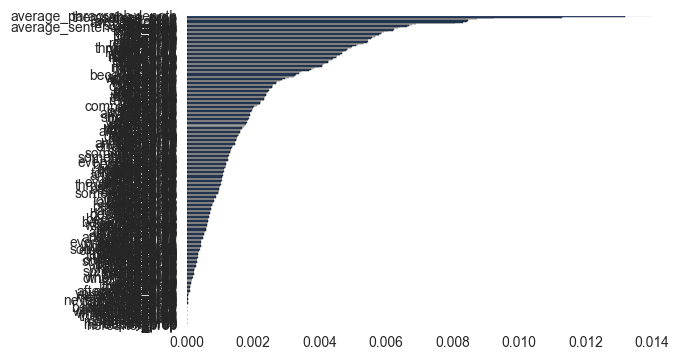

In [23]:
pd.Series(index = pred_feats, data = gbm2.feature_importances_).sort_values().plot(kind = 'barh')

In [24]:
def selectKImportance(model, X, k=5):
     return X[:,model.feature_importances_.argsort()[::-1][:k]]

In [42]:
features_col = pd.Series(index = pred_feats, data = gbm2.feature_importances_).sort_values(ascending = False)

In [50]:
features_col.keys()[0:100]

Index([u'average_paragraph_length', u'themselves_prop', u'across_prop',
       u'front_prop', u'``_prop', u':_prop', u'avg_syllables',
       u'avg_entropies', u'my_prop', u'NNP_prop', u'CC_prop', u'the_prop',
       u'essay_set', u'NN_prop', u'average_sentence_lengths', u'DT_prop',
       u'by_prop', u'keep_prop', u'VBD_prop', u'VB_prop', u'IN_prop',
       u'to_prop', u'how_prop', u'RB_prop', u'TO_prop', u',_prop', u'any_prop',
       u'JJ_prop', u'NNS_prop', u'._prop', u'PRP_prop', u'in_prop',
       u'and_prop', u'a_prop', u'really_prop', u'take_prop', u'me_prop',
       u'that_prop', u'of_prop', u'VBP_prop', u'through_prop', u'VBN_prop',
       u'''_prop', u'WRB_prop', u'PRP$_prop', u'was_prop', u'VBZ_prop',
       u'some_prop', u'VBG_prop', u'them_prop', u'made_prop', u'many_prop',
       u'is_prop', u'did_prop', u'on_prop', u'even_prop', u'MD_prop',
       u'their_prop', u'him_prop', u'had_prop', u'no_prop', u'he_prop',
       u'it_prop', u'RBR_prop', u'more_prop', u'as_prop', u

In [79]:
from sklearn.externals import joblib
joblib.dump(gbm0, 'gbm_model0.pkl')
joblib.dump(rf, 'rf_model0.pkl')

['rf_model0.pkl']

In [ ]:
#use text from sample questions to create query topics
#extract text from essay docs, cosine similarity?

lda can be used to create a corpus (small) from topic question text and then have essays be compared to it

In [136]:
essays_list = df1.essay.tolist()
processed_docs = preprocess_documents(essays_list)
dictionary = corpora.Dictionary(processed_docs)
dictionary.save('essays.dict')
corpus = [dictionary.doc2bow(essay) for essay in processed_docs]
corpora.MmCorpus.serialize('essays.mm', corpus) 

In [141]:
preprocess_docs1 = preprocess_documents(essay_question)
corpus1 = [dictionary.doc2bow(essay) for essay in preprocess_docs1]

In [82]:
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=500)
lsi.save("lsi.model")

In [137]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=50, iterations= 500)
lda.save('lda.model')

In [ ]:
index = similarities.MatrixSimilarity(lsi[corpus])
# similarities.Similarity
index.save('lsi.index')

In [ ]:
indexLda = similarities.MatrixSimilarity(lda[corpus])
indexLda.save('lda.index')

In [149]:
lda1 = models.LdaModel(corpus1, id2word=dictionary, num_topics=10, iterations= 500)

In [159]:
doc_lda = lda[corpus1]

In [150]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      31.473399        1       1  0.027650 -0.005226
2      21.412406        1       2 -0.029805  0.031176
0      15.147786        1       3  0.049963  0.014074
5      13.445749        1       4 -0.001752  0.000479
4      13.050066        1       5 -0.001817  0.000623
6       4.627211        1       6 -0.009977 -0.014265
8       0.744850        1       7 -0.008786 -0.007028
1       0.032844        1       8 -0.008492 -0.006611
9       0.032844        1       9 -0.008492 -0.006611
7       0.032844        1      10 -0.008492 -0.006611, topic_info=      Category      Freq        Term     Total  loglift  logprob
term                                                            
24693  Default  7.000000       build  7.000000  30.0000  30.0000
3806   Default  5.000000       dirig  5.000000  29.0000  29.0000
5677   Default  4.000000        moor  4.000000  28.0000  28.0000
14339  Default  4.000000        mast  4.000000  27.0000  27.0000
11143  Default  3.000000       saeng  3.000000  26.0000  26.0000
20639  Default  1.000000       peopl  1.000000  25.0000  25.0000
4692   Default  3.000000       empir  3.000000  24.0000  24.0000
23435  Default  4.000000       state  4.000000  23.0000  23.0000
10107  Default  2.000000         new  2.000000  22.0000  22.0000
24308  Default  0.000000      parent  0.000000  21.0000  21.0000
8807   Default  1.000000        live  1.000000  20.0000  20.0000
24435  Default  1.000000        road  1.000000  19.0000  19.0000
25813  Default  1.000000       water  1.000000  18.0000  18.0000
23850  Default  1.000000        said  1.000000  17.0000  17.0000
22760  Default  1.000000        area  1.000000  16.0000  16.0000
4150   Default  1.000000        hous  1.000000  15.0000  15.0000
20584  Default  1.000000        time  1.000000  14.0000  14.0000
21700  Default  1.000000     passeng  1.000000  13.0000  13.0000
5945   Default  0.000000     narciso  0.000000  12.0000  12.0000
21217  Default  0.000000      comput  0.000000  11.0000  11.0000
3181   Default  1.000000        home  1.000000  10.0000  10.0000
16065  Default  0.000000      famili  0.000000   9.0000   9.0000
20522  Default  1.000000         old  1.000000   8.0000   8.0000
22467  Default  1.000000       write  1.000000   7.0000   7.0000
11287  Default  1.000000     hibiscu  1.000000   6.0000   6.0000
10777  Default  0.000000       cuban  0.000000   5.0000   5.0000
1514   Default  1.000000       frame  1.000000   4.0000   4.0000
19508  Default  1.000000        feet  1.000000   3.0000   3.0000
18039  Default  0.000000     patient  0.000000   2.0000   2.0000
21107  Default  1.000000       plant  1.000000   1.0000   1.0000
...        ...       ...         ...       ...      ...      ...
20639  Topic10  0.000029       peopl  1.118239  -2.5392 -10.2086
22467  Topic10  0.000029       write  1.055162  -2.4812 -10.2086
12387  Topic10  0.000029    laughter  0.095867  -0.0827 -10.2086
5902   Topic10  0.000029       stori  1.160721  -2.5765 -10.2086
20584  Topic10  0.000029        time  1.201374  -2.6110 -10.2087
18039  Topic10  0.000029     patient  0.711784  -2.0875 -10.2087
22711  Topic10  0.000029     benefit  0.161241  -0.6027 -10.2087
21217  Topic10  0.000029      comput  0.390018  -1.4860 -10.2087
14489  Topic10  0.000029      believ  0.320120  -1.2885 -10.2087
23850  Topic10  0.000029        said  1.717218  -2.9682 -10.2087
3404   Topic10  0.000029        agre  0.233146  -0.9714 -10.2087
11265  Topic10  0.000029  understand  0.241682  -1.0074 -10.2087
9408   Topic10  0.000029      exampl  0.347807  -1.3714 -10.2087
23435  Topic10  0.000029       state  4.482543  -3.9277 -10.2087
18041  Topic10  0.000029     patienc  0.394029  -1.4962 -10.2087
10142  Topic10  0.000029        tell  0.344097  -1.3607 -10.2087
8907   Topic10  0.000029          ey  1.001272  -2.4288 -10.2087
24693  Topic10  0.000029       build  7.605516  -4.4564 -10